In [1]:
from skimage import data, img_as_float
astro = img_as_float(data.astronaut())
astro = astro[220:300, 220:300]
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

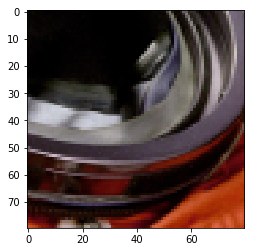

In [2]:
plt.imshow(astro)

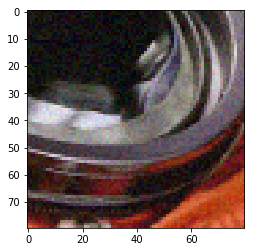

In [4]:
noisy=astro + 0.6 * astro.std() * np.random.random(astro.shape)
plt.imshow(noisy)

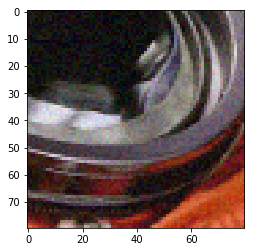

In [5]:
noisy = np.clip(noisy, 0, 1)
plt.imshow(noisy)

In [7]:
import skimage
restored = skimage.restoration.denoise_bilateral(noisy, sigma_color=0.05, sigma_spatial=15)

/Users/chstansbury/anaconda/envs/python_arpes/lib/python3.5/site-packages/skimage/restoration/_denoise.py:79: UserWarning: denoise_bilateral will default to multichannel=False in v0.15
  warn('denoise_bilateral will default to multichannel=False in v0.15')


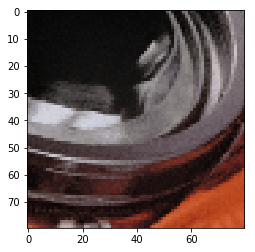

In [8]:
plt.imshow(restored)

In [25]:
from skimage import color, data, restoration
camera = color.rgb2gray(data.camera())
from scipy.signal import convolve2d
psf = np.ones((5, 5)) / 25
camera = convolve2d(camera, psf, 'same')
convolved = camera.copy()
convolved += 0.1 * convolved.std() * np.random.standard_normal(convolved.shape)
deconvolved = restoration.richardson_lucy(convolved, psf, iterations=50)

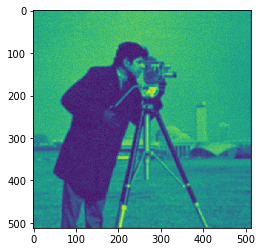

In [26]:
plt.imshow(convolved)

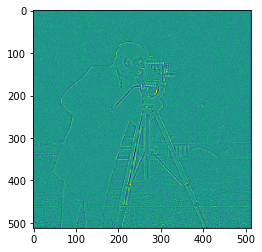

In [32]:
plt.imshow((convolved - deconvolved) - color.rgb2gray(data.camera()))

(array([ 20499.,  32620.,   9872.,   9753.,  33263.,  50377.,  85032.,
         19604.,    930.,    194.]),
 array([ -16.3497079 ,   11.70516067,   39.76002925,   67.81489783,
          95.8697664 ,  123.92463498,  151.97950356,  180.03437213,
         208.08924071,  236.14410929,  264.19897786]),
 <a list of 10 Patch objects>)

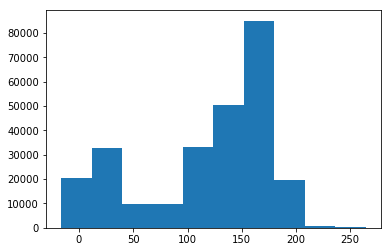

In [34]:
plt.hist(convolved.ravel())

(array([  1.15300000e+03,   6.10000000e+01,   7.50000000e+01,
          1.31000000e+02,   7.62000000e+02,   7.00100000e+03,
          1.52900000e+03,   1.29600000e+03,   1.20700000e+03,
          2.48929000e+05]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

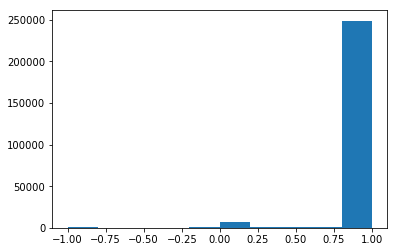

In [35]:
plt.hist(deconvolved.ravel())